In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
titanic =pd.read_csv("/Users/nikoo/Documents/analys project/titanic/Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic = titanic.dropna(subset= ["Cabin"])
titanic["Cabin"].isnull().sum()

np.int64(0)

In [42]:
titanic["Age"].isnull().sum()

np.int64(19)

In [43]:
avg_age = titanic.groupby(["Sex","Pclass"])["Age"].median()
avg_age

Sex     Pclass
female  1         35.0
        2         29.0
        3         24.0
male    1         40.0
        2         18.5
        3         25.0
Name: Age, dtype: float64

In [44]:
#fill empty age 
for Sex in ["female","male"]:
    for Pclass in [1,2,3]:
        age_avg = avg_age.loc[sex,Pclass]
        condition = (titanic["Age"].isnull())&(titanic["Sex"]==Sex)& (titanic["Pclass"]==Pclass)
        titanic.loc[condition, "Age"] = age_avg
        
        
        


In [45]:
titanic["Age"].isnull().sum()

np.int64(0)

In [ ]:
#we want to know if sex factor effects survived
sex_factor = titanic.groupby("Sex")["Survived"].sum()
sex_factor


Sex
female    91
male      45
Name: Survived, dtype: int64

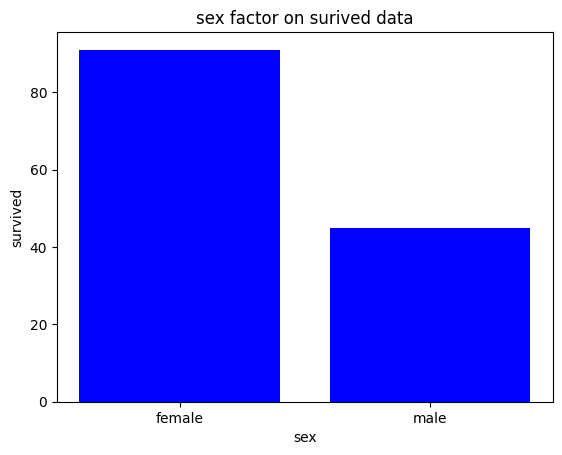

In [47]:
chart_sex_factor = plt.bar(sex_factor.index,sex_factor.values, color= "blue")
plt.title("sex factor on surived data")
plt.xlabel("sex")
plt.ylabel("survived")
plt.show()

In [48]:
sex_pclass_factor= titanic.groupby(["Sex","Pclass"])["Survived"].mean()
sex_pclass_factor

Sex     Pclass
female  1         0.962963
        2         0.900000
        3         0.666667
male    1         0.410526
        2         0.666667
        3         0.333333
Name: Survived, dtype: float64

In [60]:
pclass_factor = titanic.groupby("Pclass")["Survived"].mean()
pclass_factor

Pclass
1    0.664773
2    0.812500
3    0.500000
Name: Survived, dtype: float64

Text(0, 0.5, 'survived')

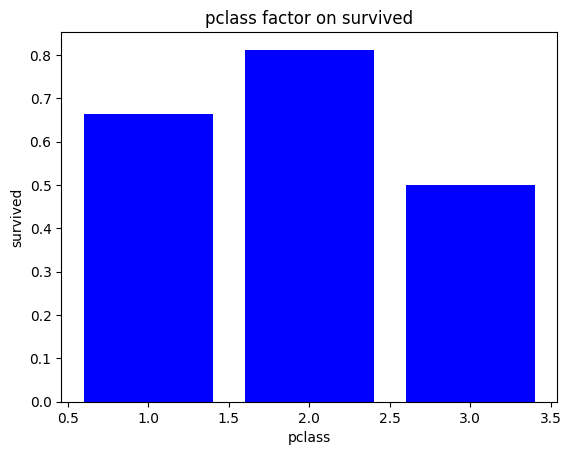

In [61]:
pclass_chart = plt.bar(pclass_factor.index, pclass_factor.values, color = "blue")
plt.title("pclass factor on survived")
plt.xlabel("pclass")
plt.ylabel("survived")

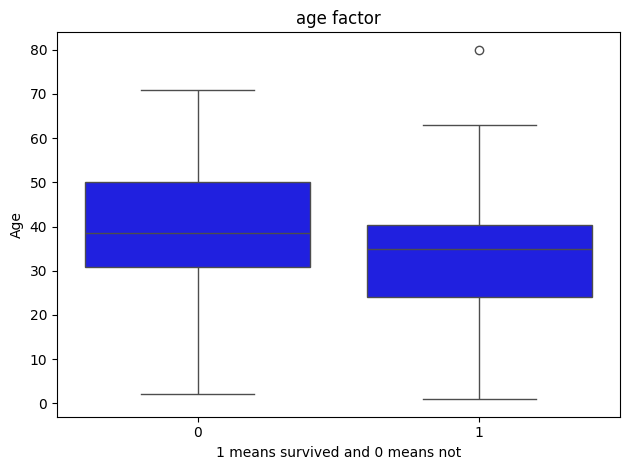

In [70]:
boxplot_chart_on_age= sns.boxplot(data = titanic, x= "Survived", y= "Age", color = "blue")
#plt.ylim(0,70)
plt.title("age factor")
plt.xlabel("1 means survived and 0 means not")
plt.ylabel("Age")
plt.tight_layout()

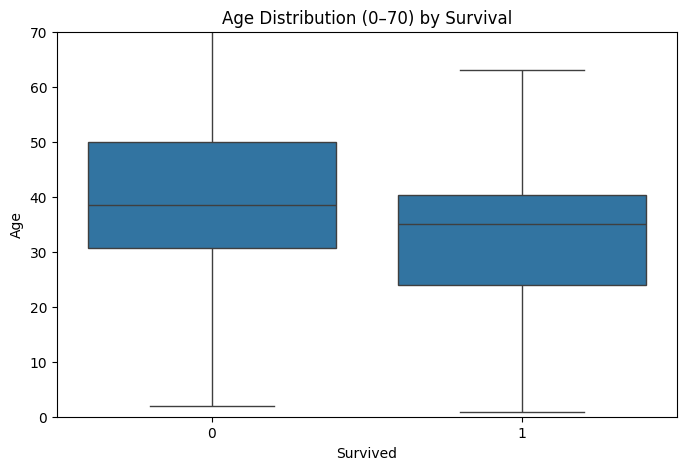

In [66]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.ylim(0, 70)  # محدود کردن محور Y
plt.title('Age Distribution (0–70) by Survival')
plt.show()


In [56]:
#effect of count of sibsp and parch
SibSp_Parch_factor = pd.pivot_table(titanic, values="Survived",index="SibSp", columns= "Parch", aggfunc= "mean")
SibSp_Parch_factor

Parch,0,1,2,4
SibSp,,,,
0,0.585106,0.666667,0.727273,NaN
1,0.777778,0.750000,0.714286,0.0
2,0.500000,1.000000,1.000000,NaN
3,NaN,NaN,0.666667,NaN


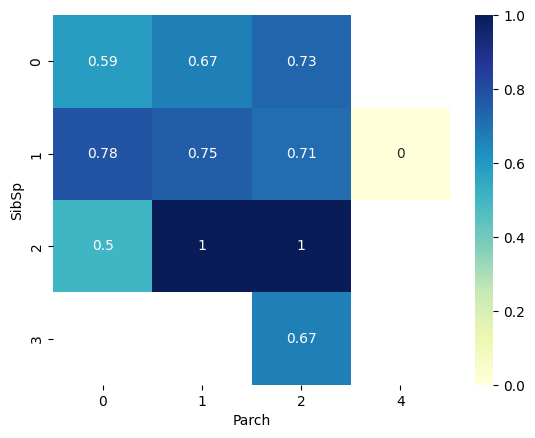

In [57]:
#heatmap_chart 
heatmap_chart = sns.heatmap(SibSp_Parch_factor,annot=True, cmap= "YlGnBu")